In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **AgriOptNet: A Hybrid Optimization and Lightweight Deep Learning Framework for Intelligent Soil texture classification and Nutrition based Crop Recommendation**
# **Soil Texture Classification Based on NPK Values for Crop Recommendation**

In [ ]:
import pandas as pd
import numpy as np
# Load soil names from CSV
soil_names_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/sol_texture.class_usda.tt_m_250m_b_1950..2017_v0.1.tif.csv"
soil_names_df = pd.read_csv(soil_names_file)
soil_names = soil_names_df["Name"].tolist()

# Load crop dataset
npk_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/Crop_Recommendation.csv"
df = pd.read_csv(npk_file)

# Define soil classification function based on NPK values
def classify_soil(n, p, k):
    if n > 80 and p > 40 and k > 40:
        return "loamy"
    elif n > 70 and p > 35 and k > 35:
        return "clayey"
    elif n < 50 and p < 30 and k < 30:
        return "sandy"
    elif n > 60 and p < 20 and k > 50:
        return "sandy clay"
    elif n < 40 and p > 50 and k > 50:
        return "silty clay"
    elif n > 50 and p > 30 and k > 30:
        return "clay loam"
    elif n < 60 and p > 40 and k < 40:
        return "silty clay loam"
    elif n > 40 and p < 30 and k > 40:
        return "sandy clay loam"
    elif n > 50 and p > 40 and k > 50:
        return "silt loam"
    elif n < 45 and p > 35 and k < 50:
        return "silt"
    elif n > 55 and p < 25 and k > 35:
        return "loamy sand"
    else:
        return "sandy loam"

# Apply soil classification to existing dataset
df["Soil_Name"] = df.apply(lambda row: classify_soil(row["Nitrogen"], row["Phosphorus"], row["Potassium"]), axis=1)
df["Soil_Name"] = df["Soil_Name"].apply(lambda x: x if x in soil_names else "Unknown")

# Define extra crops including the newly added ones
extra_crops_list = [
    "Barley", "Sugarcane", "Peanut", "Soybean", "Sunflower", "Wheat", "Mustard", "Tomato", "Potato", "Onion",
    "Groundnuts", "Green Chilli", "Sweetcorn", "Carrot", "Pumpkin", "Cabbage", "Urad Dal", "Ragi (Finger Millet)"
]

# Define estimated ranges for the new crops
crop_params = {
    "Barley": [75, 30, 45, 22, 65, 6.2, 140],
    "Sugarcane": [60, 25, 40, 28, 80, 6.8, 210],
    "Peanut": [50, 20, 35, 24, 55, 5.5, 160],
    "Soybean": [55, 22, 38, 25, 60, 6.0, 175],
    "Sunflower": [65, 28, 42, 27, 70, 6.3, 180],
    "Wheat": [70, 35, 50, 18, 50, 5.7, 130],
    "Mustard": [60, 32, 48, 21, 45, 5.8, 120],
    "Tomato": [40, 20, 30, 30, 85, 6.4, 230],
    "Potato": [55, 25, 40, 17, 48, 6.1, 110],
    "Onion": [45, 30, 45, 24, 68, 5.9, 150],
    "Groundnuts": [50, 18, 33, 26, 58, 5.8, 165],
    "Green Chilli": [35, 15, 25, 32, 75, 6.5, 190],
    "Sweetcorn": [60, 28, 40, 22, 72, 6.0, 145],
    "Carrot": [30, 20, 35, 16, 80, 6.3, 120],
    "Pumpkin": [40, 18, 28, 29, 88, 6.4, 200],
    "Cabbage": [38, 22, 30, 20, 85, 6.2, 175],
    "Urad Dal": [55, 25, 38, 23, 65, 5.7, 155],
    "Ragi (Finger Millet)": [70, 30, 45, 20, 50, 5.5, 140],
}

# Generate 100 synthetic records for each crop
generated_data = []
for crop, values in crop_params.items():
    for _ in range(100):
        n = np.random.randint(values[0] - 5, values[0] + 5)  # Small variation
        p = np.random.randint(values[1] - 3, values[1] + 3)
        k = np.random.randint(values[2] - 3, values[2] + 3)
        temp = np.random.uniform(values[3] - 1.5, values[3] + 1.5)
        humidity = np.random.uniform(values[4] - 5, values[4] + 5)
        ph = np.random.uniform(values[5] - 0.2, values[5] + 0.2)
        rainfall = np.random.randint(values[6] - 15, values[6] + 15)

        soil_name = classify_soil(n, p, k)
        if soil_name not in soil_names:
            soil_name = "Unknown"

        generated_data.append([crop, n, p, k, temp, humidity, ph, rainfall, soil_name])

# Convert generated data into a DataFrame
columns = ["Crop", "Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH_Value", "Rainfall", "Soil_Name"]
generated_df = pd.DataFrame(generated_data, columns=columns)

# Append generated data to the main dataset
df = pd.concat([df, generated_df], ignore_index=True)

# Save the updated dataset
output_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/classified_soil_updated.csv"
df.to_csv(output_file, index=False)

print(f"Updated dataset saved as {output_file} with 100 new data points per added crop.")
df

Updated dataset saved as /content/drive/MyDrive/Colab Notebooks/Crop Recommendation/classified_soil_updated.csv with 100 new data points per added crop.


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Soil_Name
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,Unknown
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,Unknown
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,clay loam
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,clay loam
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,Unknown
...,...,...,...,...,...,...,...,...,...
3995,69,28,42,20.746681,50.311267,5.432905,139.000000,Ragi (Finger Millet),sandy clay loam
3996,70,27,46,20.782687,49.853928,5.427430,136.000000,Ragi (Finger Millet),sandy clay loam
3997,71,31,47,20.965458,52.948762,5.400907,144.000000,Ragi (Finger Millet),clay loam
3998,70,29,43,20.332332,50.805946,5.570683,125.000000,Ragi (Finger Millet),sandy clay loam


# **Proposed Methodology**
# **1. Data Preprocessing:**
# **Data cleaning median imputation**

Missing values before imputation:
 Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Soil_Name      0
dtype: int64

Missing values after imputation:
 Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Soil_Name      0
dtype: int64


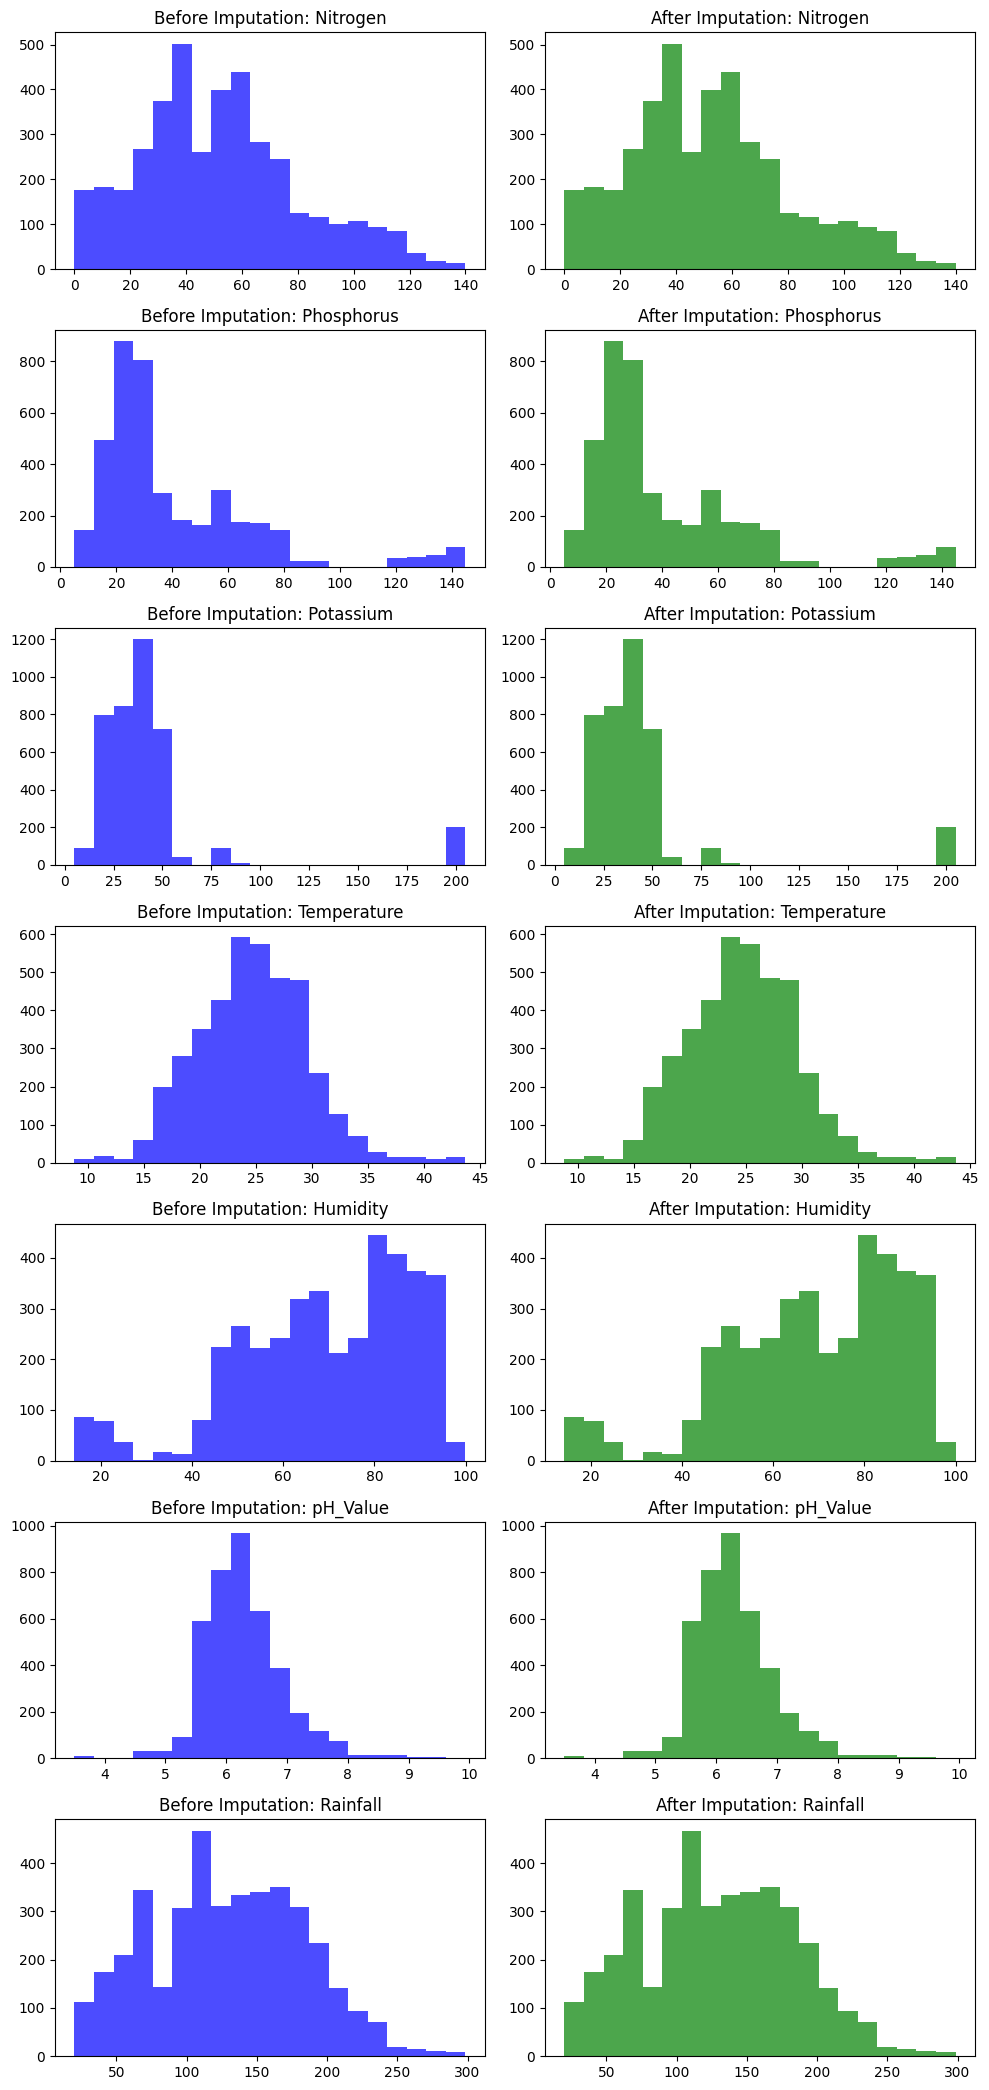


Median imputation completed. Output saved to /content/drive/MyDrive/Colab Notebooks/Crop Recommendation/medianoutput_file.csv


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Soil_Name
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,Rice,Unknown
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,Rice,Unknown
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,Rice,clay loam
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,Rice,clay loam
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,Rice,Unknown
...,...,...,...,...,...,...,...,...,...
3995,69.0,28.0,42.0,20.746681,50.311267,5.432905,139.000000,Ragi (Finger Millet),sandy clay loam
3996,70.0,27.0,46.0,20.782687,49.853928,5.427430,136.000000,Ragi (Finger Millet),sandy clay loam
3997,71.0,31.0,47.0,20.965458,52.948762,5.400907,144.000000,Ragi (Finger Millet),clay loam
3998,70.0,29.0,43.0,20.332332,50.805946,5.570683,125.000000,Ragi (Finger Millet),sandy clay loam


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the CSV file
input_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/classified_soil_updated.csv"
df = pd.read_csv(input_file)

# Check for missing values before imputation
print("Missing values before imputation:\n", df.isna().sum())

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns  # Numeric columns
categorical_cols = df.select_dtypes(exclude=['number']).columns  # Categorical columns

# Save original data before imputation for visualization
df_numeric_before = df[numeric_cols]

# Apply median imputation only to numeric columns
imputer = SimpleImputer(strategy="median")
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Keep categorical columns unchanged
df_categorical = df[categorical_cols]

# Combine both numeric and categorical columns
df_imputed = pd.concat([df_numeric_imputed, df_categorical], axis=1)

# Save the cleaned data to a new CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/medianoutput_file.csv"
df_imputed.to_csv(output_file, index=False)

# Check for missing values after imputation
print("\nMissing values after imputation:\n", df_imputed.isna().sum())

# Plot histograms before and after imputation
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(10, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols):
    axes[i, 0].hist(df_numeric_before[col].dropna(), bins=20, color='blue', alpha=0.7)
    axes[i, 0].set_title(f"Before Imputation: {col}")

    axes[i, 1].hist(df_numeric_imputed[col], bins=20, color='green', alpha=0.7)
    axes[i, 1].set_title(f"After Imputation: {col}")

plt.tight_layout()
plt.show()

print(f"\nMedian imputation completed. Output saved to {output_file}")
df_imputed

# **Handling Outliers Using Z-score**

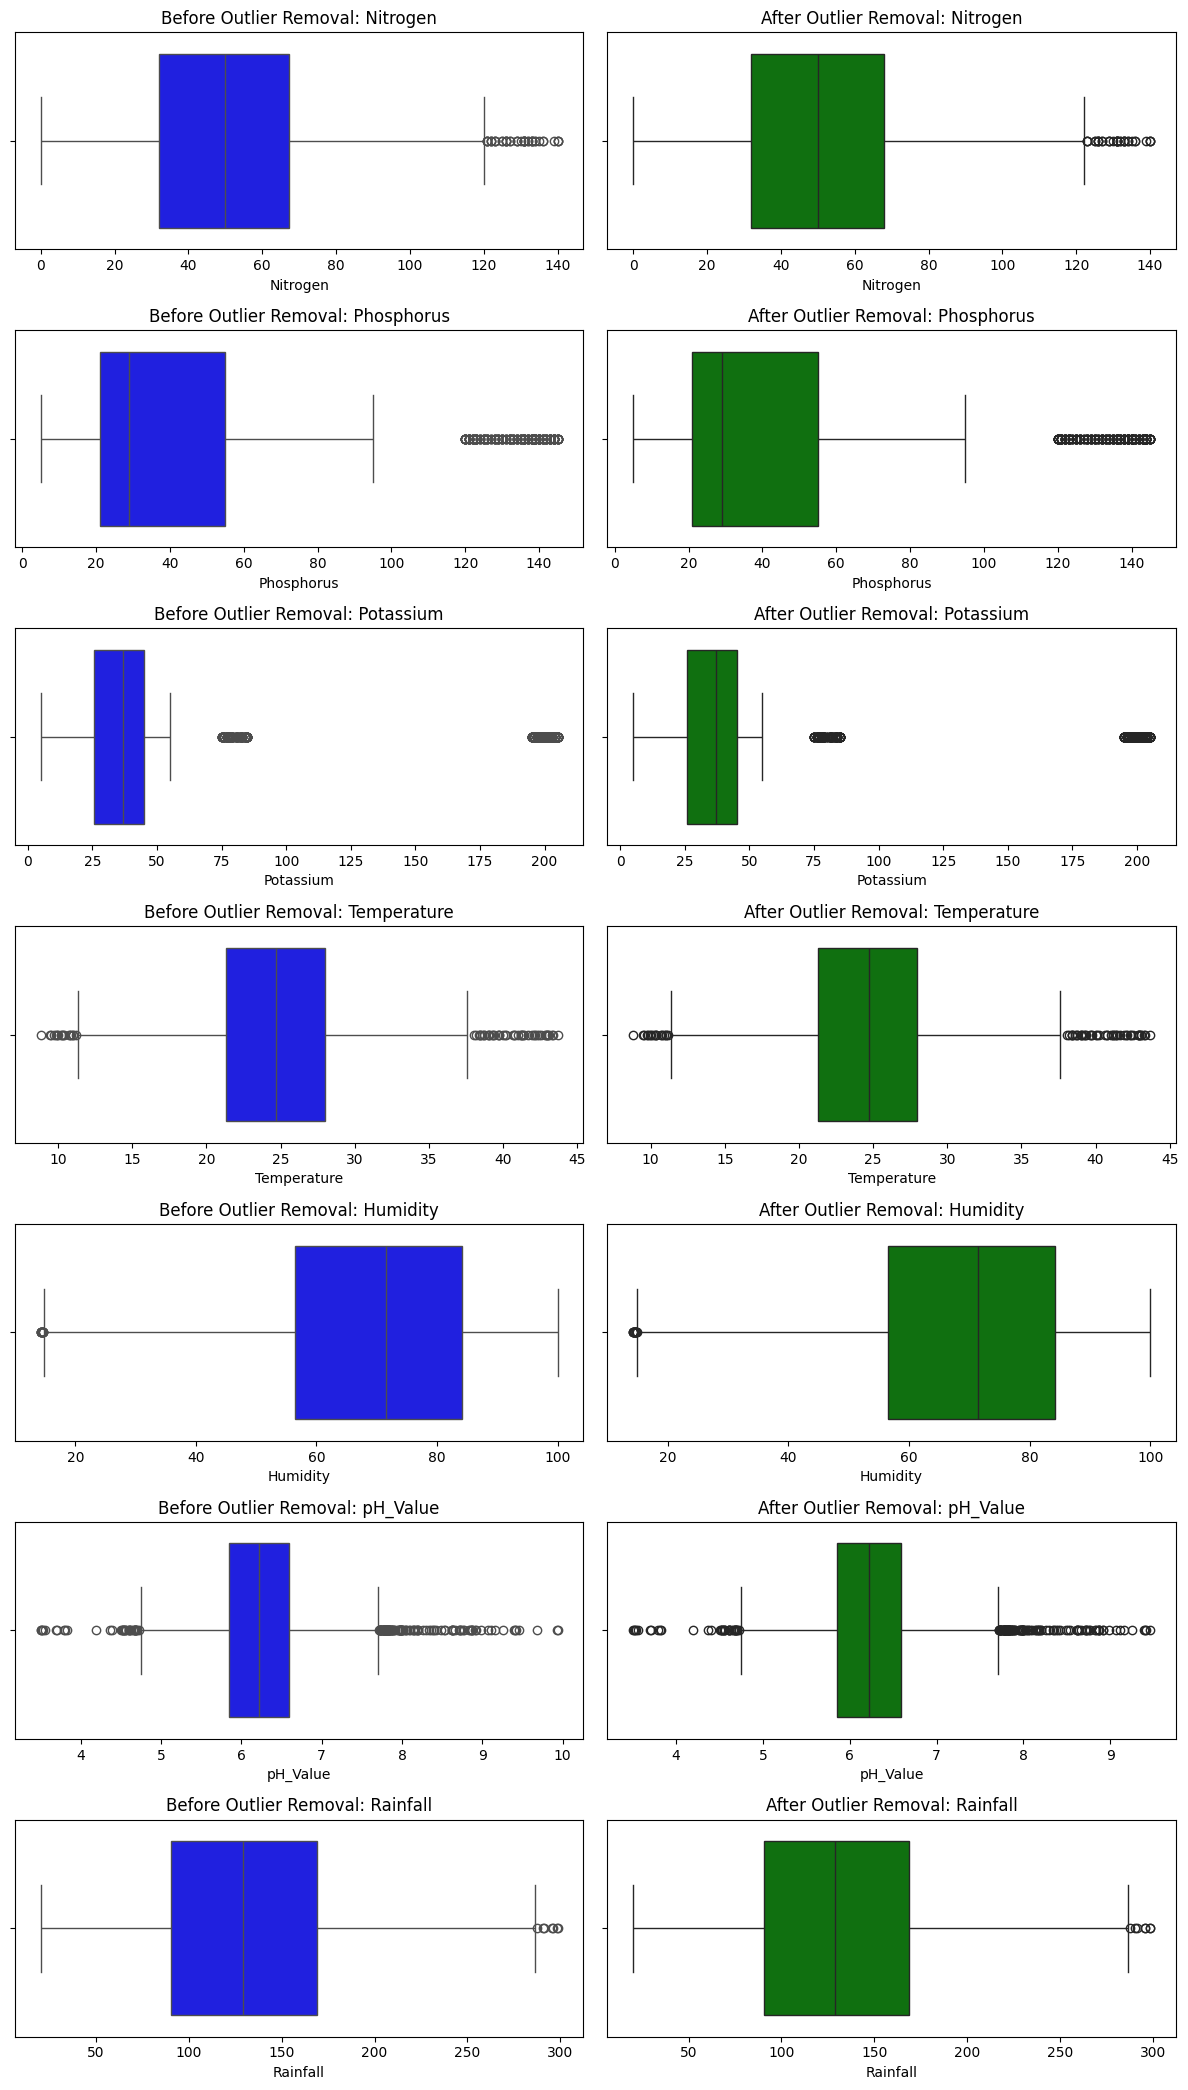

Outlier removal completed using Z-score method. Output saved to /content/drive/MyDrive/Colab Notebooks/Crop Recommendation/zscore_no_outliers.csv


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Soil_Name
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,Rice,Unknown
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,Rice,Unknown
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,Rice,clay loam
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,Rice,clay loam
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,Rice,Unknown
...,...,...,...,...,...,...,...,...,...
3995,69.0,28.0,42.0,20.746681,50.311267,5.432905,139.000000,Ragi (Finger Millet),sandy clay loam
3996,70.0,27.0,46.0,20.782687,49.853928,5.427430,136.000000,Ragi (Finger Millet),sandy clay loam
3997,71.0,31.0,47.0,20.965458,52.948762,5.400907,144.000000,Ragi (Finger Millet),clay loam
3998,70.0,29.0,43.0,20.332332,50.805946,5.570683,125.000000,Ragi (Finger Millet),sandy clay loam


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load CSV file
input_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/medianoutput_file.csv"
df = pd.read_csv(input_file)

# Select numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Define threshold (commonly used value is 3)
threshold = 5

# Filter out rows with outliers
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Save cleaned data
output_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/zscore_no_outliers.csv"
df_no_outliers.to_csv(output_file, index=False)

# Plot Box Plots before and after outlier removal
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i, 0], color="blue")
    axes[i, 0].set_title(f"Before Outlier Removal: {col}")

    sns.boxplot(x=df_no_outliers[col], ax=axes[i, 1], color="green")
    axes[i, 1].set_title(f"After Outlier Removal: {col}")

plt.tight_layout()
plt.show()

print(f"Outlier removal completed using Z-score method. Output saved to {output_file}")
df_no_outliers

# **Min-Max Normalization**

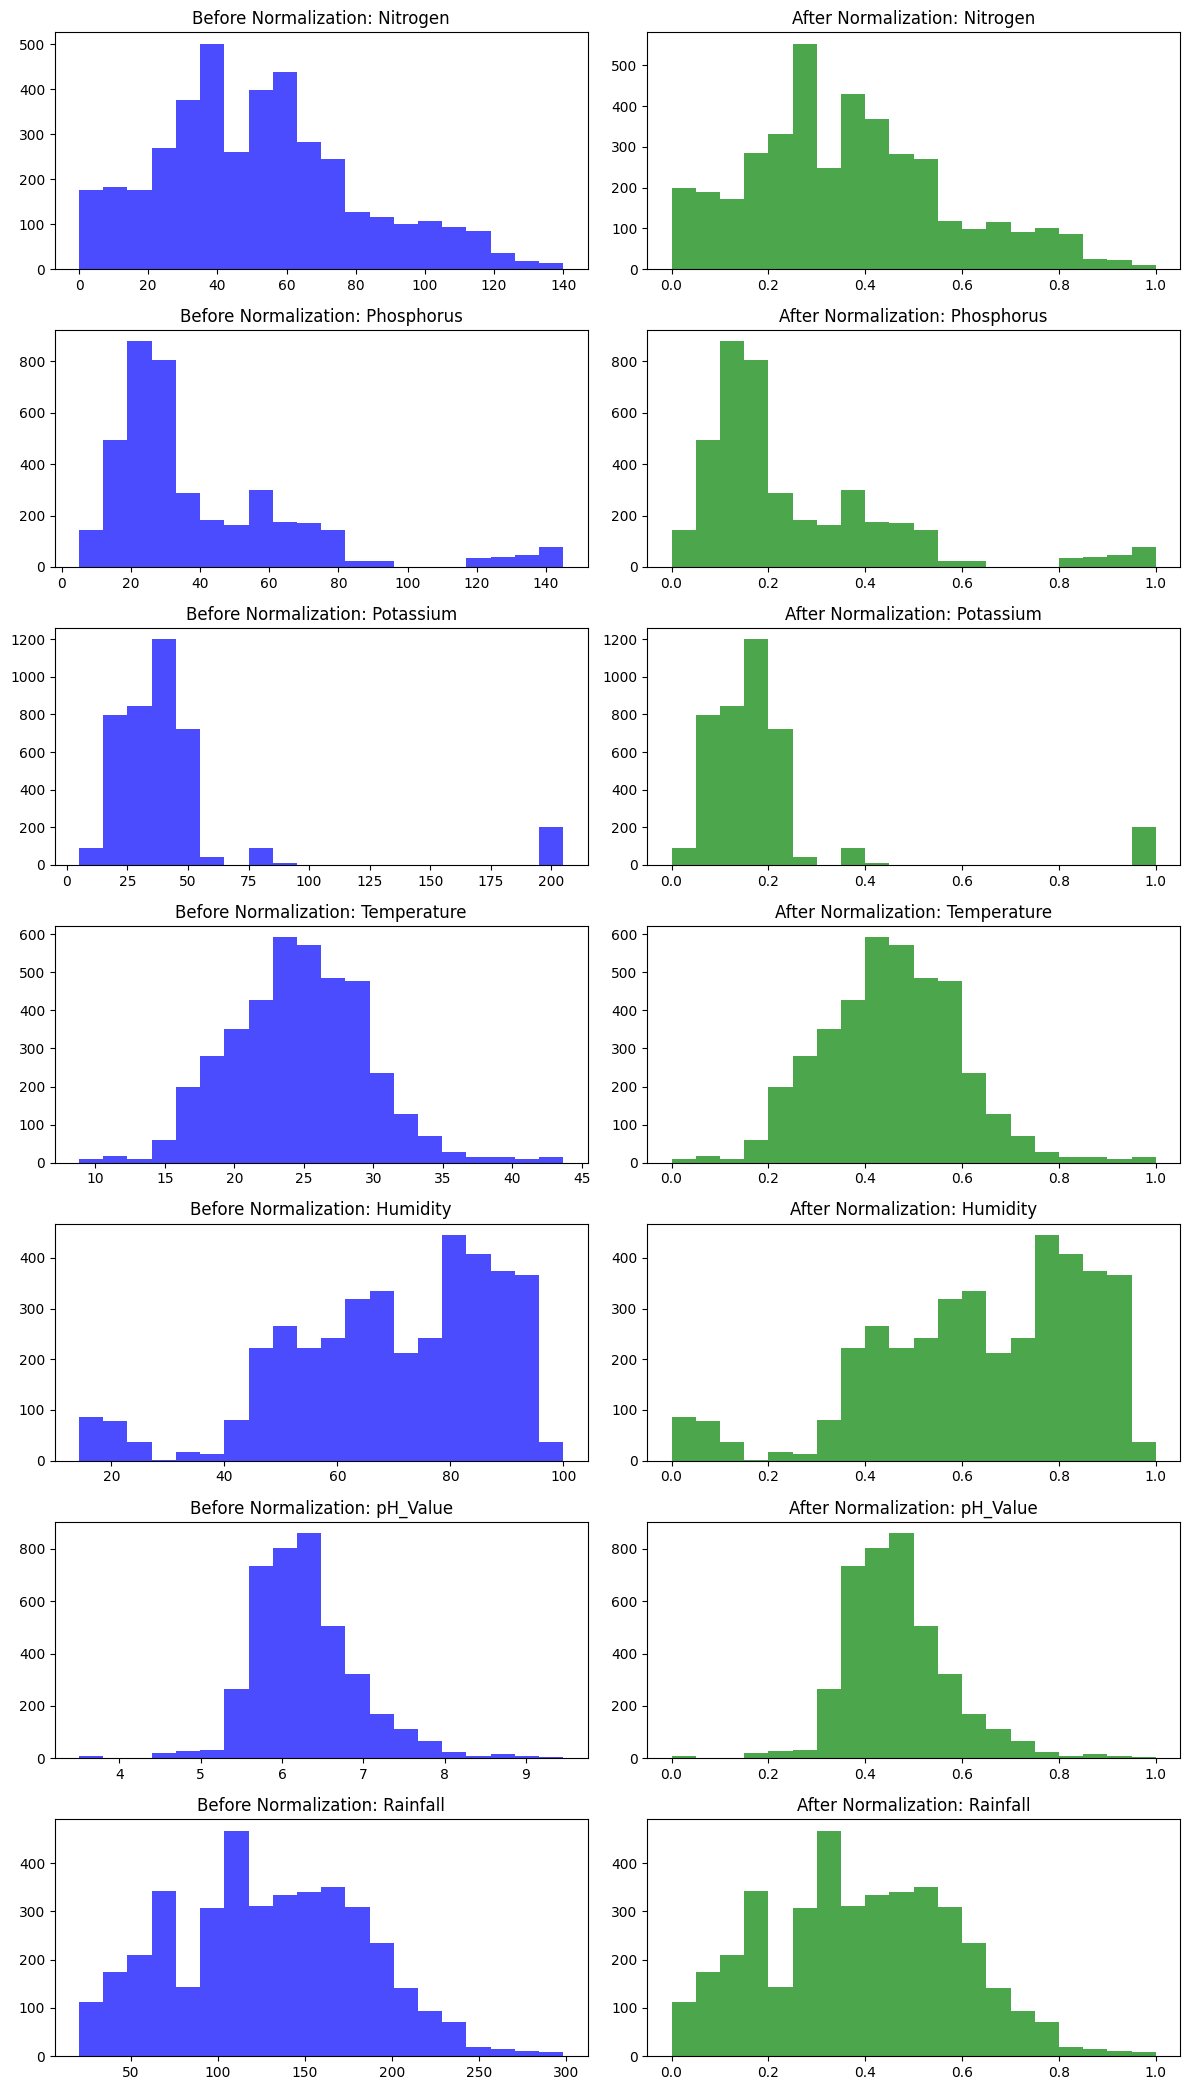


Min-Max Normalization completed. Output saved to /content/drive/MyDrive/Colab Notebooks/Crop Recommendation/minmax_output_file.csv


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Soil_Name
0,0.642857,0.264286,0.190,0.345886,0.790267,0.503503,0.656458,Rice,Unknown
1,0.607143,0.378571,0.180,0.371445,0.770633,0.593367,0.741675,Rice,Unknown
2,0.428571,0.357143,0.195,0.406854,0.793977,0.728068,0.875710,Rice,clay loam
3,0.528571,0.214286,0.175,0.506901,0.768751,0.583678,0.799905,Rice,clay loam
4,0.557143,0.264286,0.185,0.324378,0.785626,0.692510,0.871231,Rice,Unknown
...,...,...,...,...,...,...,...,...,...
3992,0.492857,0.164286,0.185,0.342068,0.420574,0.323801,0.426762,Ragi (Finger Millet),sandy clay loam
3993,0.500000,0.157143,0.205,0.343101,0.415239,0.322882,0.415984,Ragi (Finger Millet),sandy clay loam
3994,0.507143,0.185714,0.210,0.348346,0.451341,0.318428,0.444725,Ragi (Finger Millet),clay loam
3995,0.500000,0.171429,0.190,0.330178,0.426345,0.346939,0.376465,Ragi (Finger Millet),sandy clay loam


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
input_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/zscore_no_outliers.csv"
df = pd.read_csv(input_file)

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns  # Numeric columns
categorical_cols = df.select_dtypes(exclude=['number']).columns  # Categorical columns

# Save original numeric data before normalization for visualization
df_numeric_before = df[numeric_cols]

# Apply Min-Max Normalization
scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Keep categorical columns unchanged
df_categorical = df[categorical_cols]

# Combine both numeric and categorical columns
df_normalized = pd.concat([df_numeric_scaled, df_categorical], axis=1)

# Save the normalized data
output_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/minmax_output_file.csv"
df_normalized.to_csv(output_file, index=False)

# Plot histograms before and after normalization
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols):
    axes[i, 0].hist(df_numeric_before[col], bins=20, color='blue', alpha=0.7)
    axes[i, 0].set_title(f"Before Normalization: {col}")

    axes[i, 1].hist(df_numeric_scaled[col], bins=20, color='green', alpha=0.7)
    axes[i, 1].set_title(f"After Normalization: {col}")

plt.tight_layout()
plt.show()

print(f"\nMin-Max Normalization completed. Output saved to {output_file}")
df_normalized

# **Feature Extraction**
# **Statistical Features**

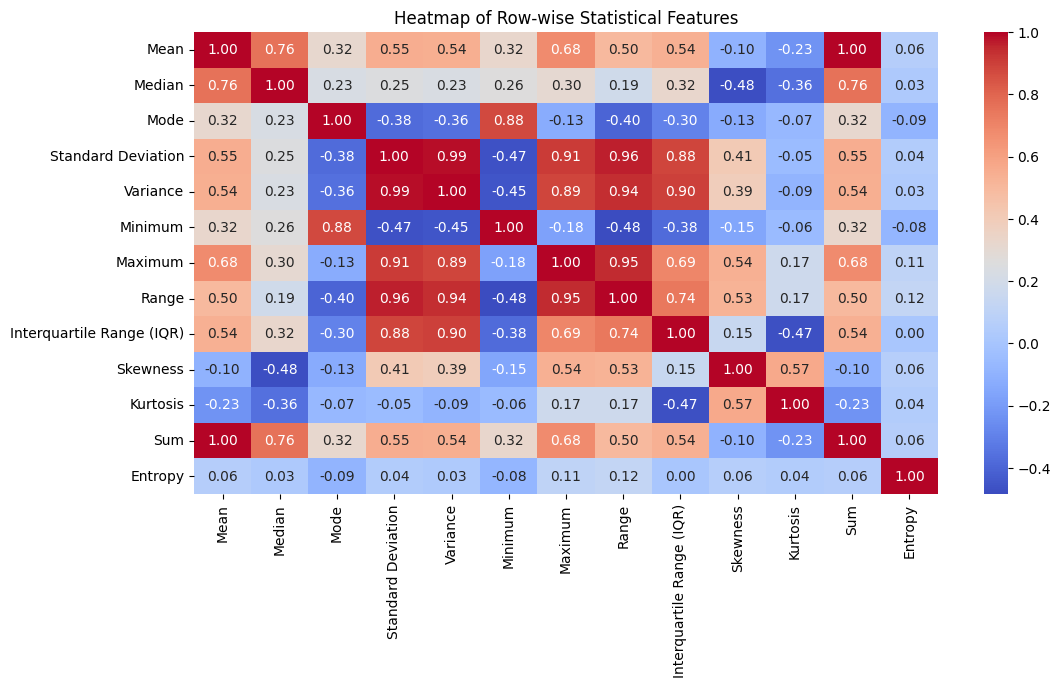

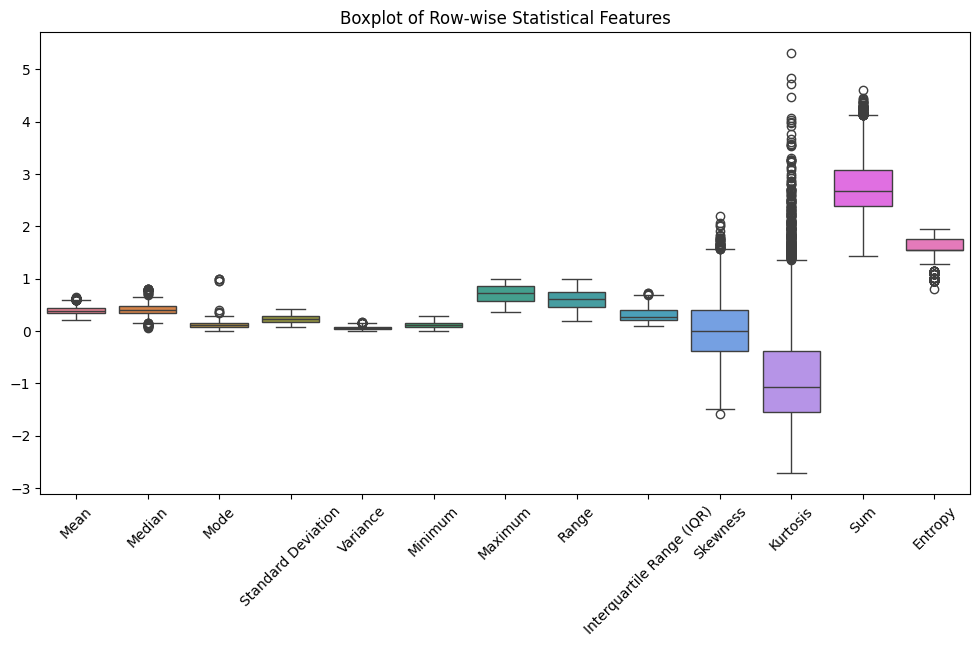

Row-wise statistical features extracted successfully. Output saved to /content/drive/MyDrive/Colab Notebooks/Crop Recommendation/row_wise_statistical_features.csv


,Mean,Median,Mode,Standard Deviation,Variance,Minimum,Maximum,Range,Interquartile Range (IQR),Skewness,Kurtosis,Sum,Entropy
0,0.484751,0.503503,0.190000,0.224699,0.050490,0.190000,0.790267,0.600267,0.344572,-0.030085,-1.649287,3.393257,1.747868
1,0.520405,0.593367,0.180000,0.217026,0.047100,0.180000,0.770633,0.590633,0.299401,-0.412265,-1.039985,3.642833,1.549826
2,0.540760,0.428571,0.195000,0.256638,0.065863,0.195000,0.875710,0.680710,0.379024,0.124878,-1.759762,3.785323,1.747868
3,0.511013,0.528571,0.175000,0.243737,0.059408,0.175000,0.799905,0.624905,0.315621,-0.361652,-1.181132,3.577093,1.351784
4,0.525739,0.557143,0.185000,0.271020,0.073452,0.185000,0.871231,0.686231,0.444736,-0.025035,-1.993676,3.680173,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0.336478,0.342068,0.164286,0.124141,0.015411,0.164286,0.492857,0.328571,0.169267,-0.418145,-1.234045,2.355348,1.549826
3993,0.337050,0.343101,0.157143,0.121750,0.014823,0.157143,0.500000,0.342857,0.151671,-0.366100,-0.869855,2.359349,1.747868
3994,0.352242,0.348346,0.185714,0.123485,0.015248,0.185714,0.507143,0.321429,0.183819,-0.254513,-1.536397,2.465697,1.549826
3995,0.334479,0.346939,0.171429,0.119187,0.014205,0.171429,0.500000,0.328571,0.141316,-0.270776,-0.850047,2.341356,1.747868


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, entropy

# Load CSV file
input_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/minmax_output_file.csv"
df = pd.read_csv(input_file)

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Compute statistical features row-wise
df_features = pd.DataFrame({
    'Mean': df_numeric.mean(axis=1),
    'Median': df_numeric.median(axis=1),
    'Mode': df_numeric.mode(axis=1).iloc[:, 0],  # Mode can have multiple values, taking the first
    'Standard Deviation': df_numeric.std(axis=1),
    'Variance': df_numeric.var(axis=1),
    'Minimum': df_numeric.min(axis=1),
    'Maximum': df_numeric.max(axis=1),
    'Range': df_numeric.max(axis=1) - df_numeric.min(axis=1),
    'Interquartile Range (IQR)': df_numeric.quantile(0.75, axis=1) - df_numeric.quantile(0.25, axis=1),
    'Skewness': df_numeric.skew(axis=1),
    'Kurtosis': df_numeric.kurtosis(axis=1),
    'Sum': df_numeric.sum(axis=1),
    'Entropy': df_numeric.apply(lambda x: entropy(np.histogram(x, bins=10)[0] + 1e-10), axis=1)  # Small value to avoid log(0)
})

# Save row-wise statistical features
output_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/row_wise_statistical_features.csv"
df_features.to_csv(output_file, index=False)

# --- Visualization: Heatmap of Statistical Features ---
plt.figure(figsize=(12, 6))
sns.heatmap(df_features.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap of Row-wise Statistical Features")
plt.show()

# --- Boxplot for Feature Distributions ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_features)
plt.xticks(rotation=45)
plt.title("Boxplot of Row-wise Statistical Features")
plt.show()

print(f"Row-wise statistical features extracted successfully. Output saved to {output_file}")
df_features

# **wavelet_transform**

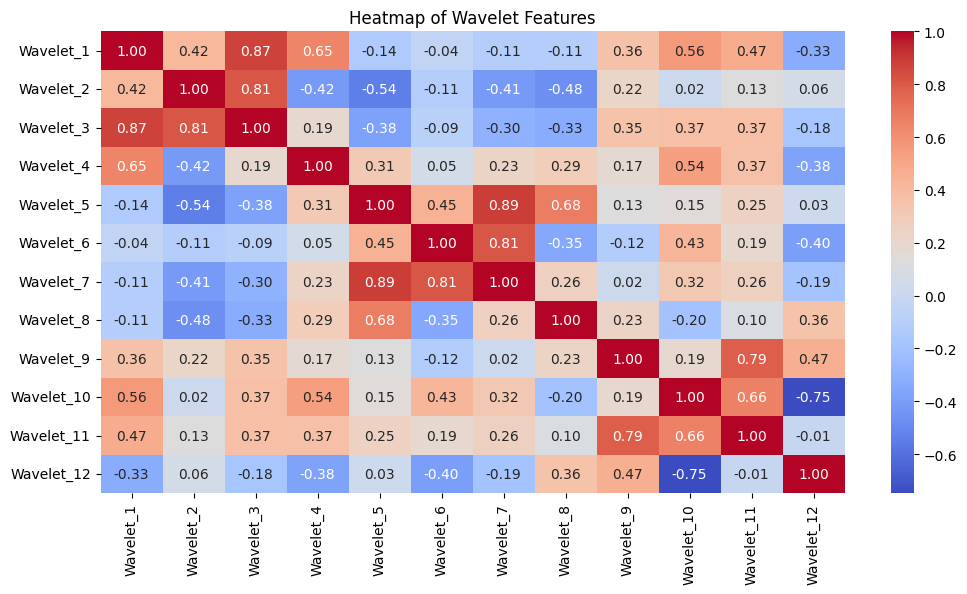

Wavelet transform features extracted successfully. Output saved to /content/drive/MyDrive/Colab Notebooks/Crop Recommendation/wavelet_features.csv


,Wavelet_1,Wavelet_2,Wavelet_3,Wavelet_4,Wavelet_5,Wavelet_6,Wavelet_7,Wavelet_8,Wavelet_9,Wavelet_10,Wavelet_11,Wavelet_12
0,1.012429,0.290914,1.303343,0.721514,0.088028,0.097600,0.185628,-0.009573,0.090059,0.152055,0.267690,-0.110228
1,1.096127,0.327547,1.423674,0.768580,0.078730,0.138405,0.217135,-0.059675,0.037900,0.116634,0.161624,-0.135372
2,1.165258,0.471474,1.636733,0.693784,-0.011379,0.103309,0.091930,-0.114688,-0.013173,0.081348,0.050508,-0.149803
3,1.094250,0.381870,1.476120,0.712379,-0.046607,0.077084,0.030478,-0.123691,0.029603,0.171820,0.222234,-0.234690
4,1.137851,0.472448,1.610299,0.665403,0.011931,0.144094,0.156025,-0.132163,0.043592,0.111052,0.207081,-0.098555
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0.695528,0.103422,0.798950,0.592105,0.005232,0.059806,0.065037,-0.054574,0.047425,0.124500,0.232335,-0.111064
3993,0.693833,0.091211,0.785045,0.602622,0.003799,0.050722,0.054521,-0.046924,0.052523,0.124038,0.242437,-0.097652
3994,0.727606,0.102004,0.829610,0.625601,0.003708,0.063548,0.067256,-0.059841,0.055861,0.119978,0.227284,-0.097825
3995,0.679455,0.083652,0.763107,0.595803,0.042901,0.032724,0.075625,0.010176,0.047341,0.120408,0.232335,-0.099121


In [ ]:
!pip install PyWavelets
import pandas as pd
import numpy as np
import pywt
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV file
input_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/minmax_output_file.csv"
df = pd.read_csv(input_file)

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Function to extract wavelet features row-wise
def wavelet_transform(row, wavelet='db1'):
    max_level = pywt.dwt_max_level(len(row), wavelet)  # Determine max level for decomposition
    level = min(3, max_level)  # Ensure we don't exceed the maximum level
    coeffs = pywt.wavedec(row, wavelet, level=level)  # Decomposition

    features = []
    for coeff in coeffs:
        features.extend([np.mean(coeff), np.std(coeff), np.max(coeff), np.min(coeff)])  # Mean, Std, Max, Min
    return features

# Apply wavelet transform row-wise
wavelet_features = df_numeric.apply(lambda row: wavelet_transform(row.values), axis=1)

# Convert to DataFrame
max_features = max(len(f) for f in wavelet_features)  # Get max number of features
wavelet_columns = [f'Wavelet_{i+1}' for i in range(max_features)]
df_wavelet = pd.DataFrame(wavelet_features.tolist(), columns=wavelet_columns)

# Save extracted wavelet features
output_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/wavelet_features.csv"
df_wavelet.to_csv(output_file, index=False)

# --- Visualization: Heatmap of Wavelet Features ---
plt.figure(figsize=(12, 6))
sns.heatmap(df_wavelet.iloc[:, :20].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap of Wavelet Features")
plt.show()

print(f"Wavelet transform features extracted successfully. Output saved to {output_file}")
df_wavelet

# **concadenate File**

In [ ]:
import pandas as pd

# Load the CSV file
input_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/medianoutput_file.csv"
df = pd.read_csv(input_file)

# Extract only 'Crop' and 'Soil_Name' columns
df_selected = df[['Crop', 'Soil_Name']]

# Save the extracted columns to a new CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/crop_soil_only.csv"
df_selected.to_csv(output_file, index=False)

print(f"Columns 'Crop' and 'Soil_Name' extracted and saved successfully. Output saved to {output_file}")
# Read the CSV files into DataFrames
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/row_wise_statistical_features.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/wavelet_features.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/crop_soil_only.csv')

# Check the shapes of both DataFrames
print("Shape of DataFrame 1:", df1.shape)
print("Shape of DataFrame 2:", df2.shape)
print("Shape of DataFrame 3:", df3.shape)


# Ensure both DataFrames have the same number of rows
# Truncate the larger DataFrame to match the row count of the smaller one
min_rows = min(df1.shape[0], df2.shape[0],df3.shape[0])
df1 = df1.iloc[:min_rows]
df2 = df2.iloc[:min_rows]
df3 = df3.iloc[:min_rows]


# Concatenate DataFrames by columns
df_concatenated = pd.concat([df1, df2,df3], axis=1)

# Display the shape of the concatenated DataFrame
print("Shape after concatenation:", df_concatenated.shape)

# Optionally, save the concatenated DataFrame to a new CSV file
df_concatenated.to_csv('/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/concadenate fused_file1.csv', index=False)
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/concadenate fused_file1.csv')
df

Columns 'Crop' and 'Soil_Name' extracted and saved successfully. Output saved to /content/drive/MyDrive/Colab Notebooks/Crop Recommendation/crop_soil_only.csv
Shape of DataFrame 1: (3997, 13)
Shape of DataFrame 2: (3997, 12)
Shape of DataFrame 3: (4000, 2)
Shape after concatenation: (3997, 27)


,Mean,Median,Mode,Standard Deviation,Variance,Minimum,Maximum,Range,Interquartile Range (IQR),Skewness,...,Wavelet_5,Wavelet_6,Wavelet_7,Wavelet_8,Wavelet_9,Wavelet_10,Wavelet_11,Wavelet_12,Crop,Soil_Name
0,0.484751,0.503503,0.190000,0.224699,0.050490,0.190000,0.790267,0.600267,0.344572,-0.030085,...,0.088028,0.097600,0.185628,-0.009573,0.090059,0.152055,0.267690,-0.110228,Rice,Unknown
1,0.520405,0.593367,0.180000,0.217026,0.047100,0.180000,0.770633,0.590633,0.299401,-0.412265,...,0.078730,0.138405,0.217135,-0.059675,0.037900,0.116634,0.161624,-0.135372,Rice,Unknown
2,0.540760,0.428571,0.195000,0.256638,0.065863,0.195000,0.875710,0.680710,0.379024,0.124878,...,-0.011379,0.103309,0.091930,-0.114688,-0.013173,0.081348,0.050508,-0.149803,Rice,clay loam
3,0.511013,0.528571,0.175000,0.243737,0.059408,0.175000,0.799905,0.624905,0.315621,-0.361652,...,-0.046607,0.077084,0.030478,-0.123691,0.029603,0.171820,0.222234,-0.234690,Rice,clay loam
4,0.525739,0.557143,0.185000,0.271020,0.073452,0.185000,0.871231,0.686231,0.444736,-0.025035,...,0.011931,0.144094,0.156025,-0.132163,0.043592,0.111052,0.207081,-0.098555,Rice,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0.336478,0.342068,0.164286,0.124141,0.015411,0.164286,0.492857,0.328571,0.169267,-0.418145,...,0.005232,0.059806,0.065037,-0.054574,0.047425,0.124500,0.232335,-0.111064,Ragi (Finger Millet),sandy clay loam
3993,0.337050,0.343101,0.157143,0.121750,0.014823,0.157143,0.500000,0.342857,0.151671,-0.366100,...,0.003799,0.050722,0.054521,-0.046924,0.052523,0.124038,0.242437,-0.097652,Ragi (Finger Millet),sandy clay loam
3994,0.352242,0.348346,0.185714,0.123485,0.015248,0.185714,0.507143,0.321429,0.183819,-0.254513,...,0.003708,0.063548,0.067256,-0.059841,0.055861,0.119978,0.227284,-0.097825,Ragi (Finger Millet),sandy clay loam
3995,0.334479,0.346939,0.171429,0.119187,0.014205,0.171429,0.500000,0.328571,0.141316,-0.270776,...,0.042901,0.032724,0.075625,0.010176,0.047341,0.120408,0.232335,-0.099121,Ragi (Finger Millet),sandy clay loam


# **Feature Selection**
# **Hybrid SFOA-DBOA for optimal feature subset selection**
# **Mutual information-based feature ranking**

Iteration 1: Exploration Phase (Sailfish update)
  Best Fitness Score: 1.0000
  Number of Selected Features: 6
Iteration 2: Exploitation Phase (Dragonfly update)
  Best Fitness Score: 1.0000
  Number of Selected Features: 6
Iteration 3: Exploration Phase (Sailfish update)
  Best Fitness Score: 1.0000
  Number of Selected Features: 9
Iteration 4: Exploitation Phase (Dragonfly update)
  Best Fitness Score: 1.0000
  Number of Selected Features: 4
Iteration 5: Exploration Phase (Sailfish update)
  Best Fitness Score: 1.0000
  Number of Selected Features: 4
Iteration 6: Exploitation Phase (Dragonfly update)
  Best Fitness Score: 1.0000
  Number of Selected Features: 6
Iteration 7: Exploration Phase (Sailfish update)
  Best Fitness Score: 1.0000
  Number of Selected Features: 4
Iteration 8: Exploitation Phase (Dragonfly update)
  Best Fitness Score: 1.0000
  Number of Selected Features: 10
Iteration 9: Exploration Phase (Sailfish update)
  Best Fitness Score: 1.0000
  Number of Selected Feat

/tmp/ipython-input-17-2383840531.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_ranking['MI Score'], y=feature_ranking['Feature'], palette='coolwarm')


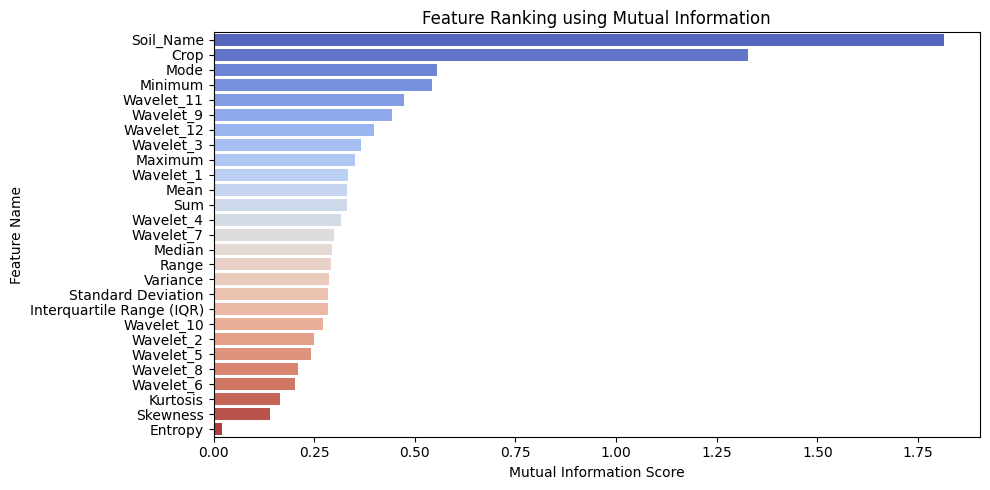

,Soil_Name,Wavelet_11,Wavelet_3,Wavelet_1,Wavelet_4,Crop
0,0,0.267690,1.303343,1.012429,0.721514,31
1,0,0.161624,1.423674,1.096127,0.768580,31
2,1,0.050508,1.636733,1.165258,0.693784,31
3,1,0.222234,1.476120,1.094250,0.712379,31
4,0,0.207081,1.610299,1.137851,0.665403,31
...,...,...,...,...,...,...
3992,4,0.232335,0.798950,0.695528,0.592105,30
3993,4,0.242437,0.785045,0.693833,0.602622,30
3994,4,0.227284,0.829610,0.727606,0.625601,30
3995,4,0.232335,0.763107,0.679455,0.595803,30


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load CSV file
input_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/concadenate fused_file1.csv"
df = pd.read_csv(input_file)

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Ensure "Crop" and "Soil_Name" exist
mandatory_columns = ["Crop", "Soil_Name"]
for col in mandatory_columns:
    if col not in df.columns:
        raise ValueError(f"Mandatory column '{col}' is missing in the dataset.")

# Define target column (Assuming last column is the target variable)
target_col = df.columns[-1]

# Ensure "Soil_Name" is not mistakenly dropped
X = df.drop(columns=[target_col], errors='ignore')  # Drop target safely
y = df[target_col]

# Restore "Soil_Name" if it was mistakenly removed
for col in mandatory_columns:
    if col not in X.columns:
        X[col] = df[col]

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable if categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# ---- Mutual Information-based Feature Ranking ----
mi_scores = mutual_info_classif(X, y)
feature_ranking = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
feature_ranking = feature_ranking.sort_values(by='MI Score', ascending=False)

# Select top 50% features + Ensure "Crop" & "Soil_Name" exist
selected_features = list(feature_ranking.head(len(feature_ranking) // 2)['Feature'].values)
for col in mandatory_columns:
    if col not in selected_features:
        selected_features.append(col)

X_selected = X[selected_features]

# ---- Hybrid SFOA-DBOA for Optimal Feature Selection ----

def initialize_population(num_features, population_size=10):
    return np.random.randint(2, size=(population_size, num_features))

def evaluate_fitness(population, X_train, X_test, y_train, y_test):
    fitness = []
    for i in range(len(population)):
        selected_indices = np.where(population[i] == 1)[0]
        if len(selected_indices) == 0:
            fitness.append(0)
            continue
        X_train_sel = X_train.iloc[:, selected_indices]
        X_test_sel = X_test.iloc[:, selected_indices]
        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        acc = accuracy_score(y_test, y_pred)
        fitness.append(acc)
    return np.array(fitness)
#Exploration Phase (Sailfish update)
def update_sailfish_position(population, best_solution, alpha=0.1):
    new_population = population.copy()
    for i in range(len(population)):
        if random.random() < alpha:
            new_population[i] = best_solution
        else:
            new_population[i] = np.random.randint(2, size=len(best_solution))
    return new_population
#Exploitation Phase (Dragonfly update)
def update_dragonfly_position(population, best_solution, beta=0.2):
    new_population = population.copy()
    for i in range(len(population)):
        if random.random() < beta:
            new_population[i] = (population[i] + best_solution) // 2
        else:
            new_population[i] = np.random.randint(2, size=len(best_solution))
    return new_population

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize Population
population_size = 10
num_features = X_selected.shape[1]
population = initialize_population(num_features, population_size)

# Run Hybrid Optimization with Logging
num_iterations = 20
for iteration in range(num_iterations):
    fitness_scores = evaluate_fitness(population, X_train, X_test, y_train, y_test)
    best_solution = population[np.argmax(fitness_scores)]
    best_fitness = max(fitness_scores)

    # Count the number of selected features
    num_selected_features = np.sum(best_solution)

    # Indicate phase type
    phase_type = "Exploration Phase (Sailfish update)" if iteration % 2 == 0 else "Exploitation Phase (Dragonfly update)"

    print(f"Iteration {iteration+1}: {phase_type}")
    print(f"  Best Fitness Score: {best_fitness:.4f}")
    print(f"  Number of Selected Features: {num_selected_features}")

    # Update population based on phase
    if iteration % 2 == 0:
        population = update_sailfish_position(population, best_solution)  # Exploration
    else:
        population = update_dragonfly_position(population, best_solution)  # Exploitation

# Select Final Features
final_selected_indices = np.where(best_solution == 1)[0]
final_selected_features = list(X_selected.columns[final_selected_indices])

# Ensure "Crop" and "Soil_Name" are included
for col in mandatory_columns:
    if col not in final_selected_features:
        final_selected_features.append(col)

# Save Selected Features to CSV
output_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/selected_features1.csv"
X_final = X[final_selected_features]
X_final.to_csv(output_file, index=False)

print(f"Feature selection completed. Selected features saved to {output_file}")

# ---- Feature Ranking Visualization ----
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_ranking['MI Score'], y=feature_ranking['Feature'], palette='coolwarm')
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature Name")
plt.title("Feature Ranking using Mutual Information")
plt.tight_layout()
plt.show()
X_final

# **Classification**

# **Proposed Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2, EfficientNetV2B0
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, matthews_corrcoef,
    precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)

# Load and Preprocess Data
def load_and_preprocess_data(csv_file):
    df = pd.read_csv(csv_file)
    soil_encoder = LabelEncoder()
    crop_encoder = LabelEncoder()

    df['Soil_Label'] = soil_encoder.fit_transform(df['Soil_Name'])
    df['Crop_Label'] = crop_encoder.fit_transform(df['Crop'])

    X = df['Soil_Label'].values.reshape(-1, 1)
    y = to_categorical(df['Crop_Label'])

    # Convert categorical soil data into image-like input
    X_expanded = np.repeat(X, 128 * 128 * 3).reshape(-1, 128, 128, 3).astype(np.float32)
    return train_test_split(X_expanded, y, test_size=0.2, random_state=42)

# ShuffleNet-like Block
def shuffle_block(input_tensor, filters):
    x = layers.Conv2D(filters, (1, 1), padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.DepthwiseConv2D((3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

# Squeeze-and-Excite Block
def squeeze_excite_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Dense(filters // ratio, activation='relu')(se)
    se = layers.Dense(filters, activation='sigmoid')(se)
    return layers.Multiply()([input_tensor, se])

# Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.keras.backend.clip(y_pred, 1e-7, 1 - 1e-7)
        ce = -y_true * tf.keras.backend.log(y_pred)
        weight = alpha * tf.keras.backend.pow((1 - y_pred), gamma)
        return tf.keras.backend.mean(weight * ce)
    return loss

# Build SoilCropNet
def build_soilcropnet(input_shape=(128, 128, 3), num_classes=5):
    inputs = keras.Input(shape=input_shape)

    mobilenet = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape, alpha=0.5)
    mobilenet.trainable = False
    x1 = mobilenet(inputs)

    efficientnet = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=input_shape)
    efficientnet.trainable = False
    x2 = efficientnet(inputs)

    x3 = shuffle_block(inputs, 32)
    x3 = layers.Conv2D(64, (1, 1), activation='relu')(x3)
    x3 = layers.Resizing(x1.shape[1], x1.shape[2])(x3)

    fusion = layers.Concatenate()([x1, x2, x3])
    fusion = squeeze_excite_block(fusion)
    x = layers.GlobalAveragePooling2D()(fusion)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

# Path to CSV
csv_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/selected_features1.csv"
X_train, X_test, y_train, y_test = load_and_preprocess_data(csv_file)

# Build and Compile Model
model = build_soilcropnet(input_shape=(128, 128, 3), num_classes=y_train.shape[1])
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predictions and Metrics
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

# Calculate Classification Metrics
accuracy = np.sum(TP) / np.sum(cm)
precision = np.where((TP + FP) != 0, TP / (TP + FP), 0)
recall = np.where((TP + FN) != 0, TP / (TP + FN), 0)
f1 = np.where((precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0)
specificity = np.where((TN + FP) != 0, TN / (TN + FP), 0)
mcc = np.where((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) != 0,
               (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)), 0)
npv = np.where((TN + FN) != 0, TN / (TN + FN), 0)
fpr = np.where((FP + TN) != 0, FP / (FP + TN), 0)
fnr = np.where((FN + TP) != 0, FN / (FN + TP), 0)

# Calculate Regression Metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {np.mean(precision):.5f}")
print(f"Recall (Sensitivity): {np.mean(recall):.5f}")
print(f"F1 Score: {np.mean(f1):.5f}")
print(f"Specificity: {np.mean(specificity):.5f}")
print(f"MCC (Matthews Correlation Coefficient): {np.mean(mcc):.5f}")
print(f"Negative Predictive Value (NPV): {np.mean(npv):.5f}")
print(f"False Positive Rate (FPR): {np.mean(fpr):.5f}")
print(f"False Negative Rate (FNR): {np.mean(fnr):.5f}")

# Print Error Metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

3201480/3201480 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.0560 - loss: 0.0214 - val_accuracy: 0.1262 - val_loss: 0.0190
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.1018 - loss: 0.0185 - val_accuracy: 0.1063 - val_loss: 0.0160
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.1044 - loss: 0.0163 - val_accuracy: 0.1163 - val_loss: 0.0149
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.1228 - loss: 0.0153 - val_accuracy: 0.1238 - val_loss: 0.0141
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.1355 - loss: 0.0150 - val_accuracy: 0.1300 - val_loss: 0.0138
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.1279 - loss: 0.0145 - val_accuracy: 0.1300 - val_loss: 0.0134
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.1351 - loss: 0.0142 - val_accuracy: 0.1500 - val_loss: 0.01

/tmp/ipython-input-2-3385365086.py:109: RuntimeWarning: invalid value encountered in divide
  precision = np.where((TP + FP) != 0, TP / (TP + FP), 0)
/tmp/ipython-input-2-3385365086.py:111: RuntimeWarning: invalid value encountered in divide
  f1 = np.where((precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0)
/tmp/ipython-input-2-3385365086.py:114: RuntimeWarning: invalid value encountered in divide
  (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)), 0)


# **Crop Recommendation Using Reinforcement Learning(proposed):**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import random
from collections import deque

# CSV File Path
csv_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/selected_features1.csv"

# Load and Process CSV File
def load_and_preprocess_data(csv_file):
    df = pd.read_csv(csv_file)

    # Encode Categorical Data (Soil_Name, Crop)
    soil_encoder = LabelEncoder()
    crop_encoder = LabelEncoder()

    df["Soil_Label"] = soil_encoder.fit_transform(df["Soil_Name"])
    df["Crop_Label"] = crop_encoder.fit_transform(df["Crop"])

    # Prepare Input and Output Data
    X = df[["Soil_Label"]].values  # Features
    y = to_categorical(df["Crop_Label"])  # One-hot encode target labels

    # Normalize Features
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    return X_train, X_test, y_train, y_test, len(np.unique(df["Crop_Label"]))

# Load Data
X_train, X_test, y_train, y_test, action_size = load_and_preprocess_data(csv_file)

# Modified Deep Q-Network (MDQL-RA) with Entropy Regularization
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.entropy_beta = 0.01  # Entropy regularization coefficient
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential([
            Dense(64, activation='relu', input_dim=self.state_size),
            Dropout(0.2),
            Dense(64, activation='relu'),
            Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        probabilities = tf.nn.softmax(act_values[0] / self.entropy_beta).numpy()
        return np.random.choice(self.action_size, p=probabilities)

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0]))
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Reward Function (Soil Health, Yield, Climate Factors)
def calculate_reward(soil_health, historical_yield, temperature, rainfall, humidity, optimal_yield):
    reward = 0
    reward += soil_health * 10
    reward += (historical_yield / optimal_yield) * 20
    reward -= abs(temperature - 25) * 2  # Ideal temperature = 25°C
    reward -= abs(rainfall - 100) * 1  # Ideal rainfall = 100mm
    reward -= abs(humidity - 50) * 1  # Ideal humidity = 50%
    return reward

# Initialize MDQL-RA Agent
state_size = X_train.shape[1]
agent = DQNAgent(state_size, action_size)

# Training Loop
episodes = 10
batch_size = 32
optimal_yield = 5000  # Assumed optimal yield

for e in range(episodes):
    state = X_train[random.randint(0, len(X_train) - 1)].reshape(1, -1)
    total_reward = 0

    for time in range(100):
        action = agent.act(state)
        next_state = X_train[random.randint(0, len(X_train) - 1)].reshape(1, -1)
        reward = calculate_reward(state[0][0], 3000, 25, 100, 50, optimal_yield)  # Example values
        done = time == 99
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            print(f"Episode {e+1}/{episodes}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")
            break

    if len(agent.memory) > batch_size:
        agent.replay(batch_size)
import pandas as pd

# File Path (Update as needed)
csv_file = "/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/selected_features1.csv"

# Load CSV File
df = pd.read_csv(csv_file)

# Display column names (for reference)
print("Available Columns:", df.columns.tolist())

# Get user input
Wavelet_11 = float(input("Enter Wavelet_11 value: "))
Wavelet_3 = float(input("Enter Wavelet_3 value: "))
Wavelet_4 = float(input("Enter Wavelet_4 value: "))

# Find the closest matching row using absolute difference
df["Diff"] = abs(df["Wavelet_11"] - Wavelet_11) + abs(df["Wavelet_3"] - Wavelet_3) + abs(df["Wavelet_4"] - Wavelet_4)
matching_row = df.loc[df["Diff"].idxmin()]  # Find row with minimum difference

# Display the closest match
print("\nClosest Match:")
print(f"Soil_Name: {matching_row['Soil_Name']}")
print(f"Crop: {matching_row['Crop']}")
print(f"Wavelet_11: {matching_row['Wavelet_11']}, Wavelet_3: {matching_row['Wavelet_3']}, Wavelet_4: {matching_row['Wavelet_4']}")

# Get the top 3 most frequent soils
top_soils = df["Soil_Name"].value_counts().nlargest(3).index.tolist()

# Display Best 3 Soils and Their Best Crops
print("\nBest 3 Soils & Best Crops:")
for soil in top_soils:
    best_crop = df[df["Soil_Name"] == soil]["Crop"].mode()[0]  # Most frequent crop for that soil
    print(f"- Soil: {soil} → Best Crop: {best_crop}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Episode 1/10, Total Reward: 1642.50, Epsilon: 1.0000
Episode 2/10, Total Reward: 1741.25, Epsilon: 0.9950
Episode 3/10, Total Reward: 1647.50, Epsilon: 0.9900
Episode 4/10, Total Reward: 1720.00, Epsilon: 0.9851
Episode 5/10, Total Reward: 1727.50, Epsilon: 0.9801
Episode 6/10, Total Reward: 1732.50, Epsilon: 0.9752
Episode 7/10, Total Reward: 1711.25, Epsilon: 0.9704
Episode 8/10, Total Reward: 1738.75, Epsilon: 0.9655
Episode 9/10, Total Reward: 1647.50, Epsilon: 0.9607
Episode 10/10, Total Reward: 1718.75, Epsilon: 0.9559
Available Columns: ['Soil_Name', 'Wavelet_11', 'Wavelet_3', 'Wavelet_1', 'Wavelet_4', 'Crop']
Enter Wavelet_11 value: 76
Enter Wavelet_3 value: 89
Enter Wavelet_4 value: 90

Closest Match:
Soil_Name: 7.0
Crop: 0.0
Wavelet_11: 0.4538824665486056, Wavelet_3: 1.2847709157560905, Wavelet_4: 1.014758694923528

Best 3 Soils & Best Crops:
- Soil: 5 → Best Crop: 5
- Soil: 0 → Best Crop: 1
- Soil: 8 → Best Crop: 14
